In [2]:
import os
import rasterio
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
from rasterio import plot
from sklearn.preprocessing import LabelEncoder

In [3]:
INF = -3.3999999521443642e+38

In [4]:
soja_tif = list()
urban_tif = list()
arbust_tif = list()

for root, dirs, files in os.walk('./bahia/soja/tif'):
    path = root.split(os.sep)
    path = '/'.join(path)
    for file in files:
        soja_tif.append(os.path.join(path, file))
        
for root, dirs, files in os.walk('./bahia/area_urbana/tif'):
    path = root.split(os.sep)
    path = '/'.join(path)
    for file in files:
        urban_tif.append(os.path.join(path, file))
        
for root, dirs, files in os.walk('./bahia/arbustivo/tif'):
    path = root.split(os.sep)
    path = '/'.join(path)
    for file in files:
        arbust_tif.append(os.path.join(path, file))
        
soja_tif = list(filter(lambda x: x.endswith('.tif'), soja_tif))
urban_tif = list(filter(lambda x: x.endswith('.tif'), urban_tif))
arbust_tif = list(filter(lambda x: x.endswith('.tif'), arbust_tif))

soja_tif = np.asarray(soja_tif)
urban_tif = np.asarray(urban_tif)
arbust_tif = np.asarray(arbust_tif)

In [5]:
X = list()
Y = list()
for i, file in enumerate(soja_tif):
#     if not i < len(urban_tif):
#         break
    temp = xr.open_rasterio(file).data
    temp[temp == INF] = 0
    shape = temp.shape
    temp = temp.reshape((shape[1], shape[2], shape[0]))
    X.append(temp)
    Y.append(1)
    
for i, file in enumerate(urban_tif):
    temp = xr.open_rasterio(file).data
    temp[temp == INF] = 0
    shape = temp.shape
    temp = temp.reshape((shape[1], shape[2], shape[0]))
    X.append(temp)
    Y.append(0)
    
for i, file in enumerate(arbust_tif):
    temp = xr.open_rasterio(file).data
    temp[temp == INF] = 0
    shape = temp.shape
    temp = temp.reshape((shape[1], shape[2], shape[0]))
    X.append(temp)
    Y.append(0)
    
X = np.array(X)
Y = np.asarray(Y)

X.shape

(108, 20, 20, 5)

In [5]:
# plot = plt.contourf(X[40][0].astype(int))
# plt.colorbar(plot)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15)

In [7]:
X_train.shape

(91, 20, 20, 5)

In [9]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(16, 16), 
                      input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), 
                      activation = 'relu'))

model.add(MaxPool2D(pool_size=(4, 4)))

# model.add(Conv2D(filters=16, kernel_size=(4, 4), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

W0625 10:06:11.779367 140545889335104 deprecation_wrapper.py:119] From /home/adriano/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0625 10:06:11.791746 140545889335104 deprecation.py:506] From /home/adriano/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0625 10:06:11.820063 140545889335104 deprecation_wrapper.py:119] From /home/adriano/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 10:06:11.838991 140545889335104 deprecation_wrapper.py:119] From /home/adriano/.local/lib/pyt

Train on 91 samples, validate on 17 samples
Epoch 1/500
91/91 [==============================] - 3s 29ms/step - loss: 10.8653 - acc: 0.3297 - val_loss: 9.6033 - val_acc: 0.4118
Epoch 2/500
91/91 [==============================] - 0s 176us/step - loss: 10.8652 - acc: 0.3297 - val_loss: 9.6031 - val_acc: 0.4118
Epoch 3/500
91/91 [==============================] - 0s 182us/step - loss: 10.8651 - acc: 0.3297 - val_loss: 9.6028 - val_acc: 0.4118
Epoch 4/500
91/91 [==============================] - 0s 195us/step - loss: 10.8650 - acc: 0.3297 - val_loss: 9.6026 - val_acc: 0.4118
Epoch 5/500
91/91 [==============================] - 0s 211us/step - loss: 10.8649 - acc: 0.3297 - val_loss: 9.6023 - val_acc: 0.4118
Epoch 6/500
91/91 [==============================] - 0s 187us/step - loss: 10.8647 - acc: 0.3297 - val_loss: 9.6021 - val_acc: 0.4118
Epoch 7/500
91/91 [==============================] - 0s 189us/step - loss: 10.8646 - acc: 0.3297 - val_loss: 9.6019 - val_acc: 0.4118
Epoch 8/500
91/91 [

91/91 [==============================] - 0s 184us/step - loss: 10.8529 - acc: 0.3297 - val_loss: 9.5783 - val_acc: 0.4118
Epoch 122/500
91/91 [==============================] - 0s 166us/step - loss: 10.8528 - acc: 0.3297 - val_loss: 9.5782 - val_acc: 0.4118
Epoch 123/500
91/91 [==============================] - 0s 185us/step - loss: 10.8527 - acc: 0.3297 - val_loss: 9.5780 - val_acc: 0.4118
Epoch 124/500
91/91 [==============================] - 0s 167us/step - loss: 10.8526 - acc: 0.3297 - val_loss: 9.5778 - val_acc: 0.4118
Epoch 125/500
91/91 [==============================] - 0s 163us/step - loss: 10.8525 - acc: 0.3297 - val_loss: 9.5776 - val_acc: 0.4118
Epoch 126/500
91/91 [==============================] - 0s 170us/step - loss: 10.8524 - acc: 0.3297 - val_loss: 9.5774 - val_acc: 0.4118
Epoch 127/500
91/91 [==============================] - 0s 201us/step - loss: 10.8523 - acc: 0.3297 - val_loss: 9.5772 - val_acc: 0.4118
Epoch 128/500
91/91 [==============================] - 0s 158u

91/91 [==============================] - 0s 187us/step - loss: 10.8431 - acc: 0.3297 - val_loss: 9.5587 - val_acc: 0.4118
Epoch 242/500
91/91 [==============================] - 0s 183us/step - loss: 10.8430 - acc: 0.3297 - val_loss: 9.5586 - val_acc: 0.4118
Epoch 243/500
91/91 [==============================] - 0s 188us/step - loss: 10.8429 - acc: 0.3297 - val_loss: 9.5585 - val_acc: 0.4118
Epoch 244/500
91/91 [==============================] - 0s 184us/step - loss: 10.8429 - acc: 0.3297 - val_loss: 9.5583 - val_acc: 0.4118
Epoch 245/500
91/91 [==============================] - 0s 190us/step - loss: 10.8428 - acc: 0.3297 - val_loss: 9.5582 - val_acc: 0.4118
Epoch 246/500
91/91 [==============================] - 0s 187us/step - loss: 10.8428 - acc: 0.3297 - val_loss: 9.5580 - val_acc: 0.4118
Epoch 247/500
91/91 [==============================] - 0s 172us/step - loss: 10.8427 - acc: 0.3297 - val_loss: 9.5579 - val_acc: 0.4118
Epoch 248/500
91/91 [==============================] - 0s 215u

91/91 [==============================] - 0s 212us/step - loss: 10.8355 - acc: 0.3297 - val_loss: 9.5435 - val_acc: 0.4118
Epoch 362/500
91/91 [==============================] - 0s 160us/step - loss: 10.8355 - acc: 0.3297 - val_loss: 9.5434 - val_acc: 0.4118
Epoch 363/500
91/91 [==============================] - 0s 164us/step - loss: 10.8354 - acc: 0.3297 - val_loss: 9.5433 - val_acc: 0.4118
Epoch 364/500
91/91 [==============================] - 0s 159us/step - loss: 10.8353 - acc: 0.3297 - val_loss: 9.5432 - val_acc: 0.4118
Epoch 365/500
91/91 [==============================] - 0s 171us/step - loss: 10.8353 - acc: 0.3297 - val_loss: 9.5431 - val_acc: 0.4118
Epoch 366/500
91/91 [==============================] - 0s 167us/step - loss: 10.8352 - acc: 0.3297 - val_loss: 9.5430 - val_acc: 0.4118
Epoch 367/500
91/91 [==============================] - 0s 185us/step - loss: 10.8352 - acc: 0.3297 - val_loss: 9.5429 - val_acc: 0.4118
Epoch 368/500
91/91 [==============================] - 0s 163u

91/91 [==============================] - 0s 148us/step - loss: 10.8296 - acc: 0.3297 - val_loss: 9.5317 - val_acc: 0.4118
Epoch 482/500
91/91 [==============================] - 0s 158us/step - loss: 10.8296 - acc: 0.3297 - val_loss: 9.5316 - val_acc: 0.4118
Epoch 483/500
91/91 [==============================] - 0s 172us/step - loss: 10.8295 - acc: 0.3297 - val_loss: 9.5315 - val_acc: 0.4118
Epoch 484/500
91/91 [==============================] - 0s 163us/step - loss: 10.8295 - acc: 0.3297 - val_loss: 9.5314 - val_acc: 0.4118
Epoch 485/500
91/91 [==============================] - 0s 164us/step - loss: 10.8294 - acc: 0.3297 - val_loss: 9.5313 - val_acc: 0.4118
Epoch 486/500
91/91 [==============================] - 0s 172us/step - loss: 10.8294 - acc: 0.3297 - val_loss: 9.5313 - val_acc: 0.4118
Epoch 487/500
91/91 [==============================] - 0s 159us/step - loss: 10.8293 - acc: 0.3297 - val_loss: 9.5312 - val_acc: 0.4118
Epoch 488/500
91/91 [==============================] - 0s 165u

In [11]:
model.predict(X_test[0])

ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (20, 20, 5)

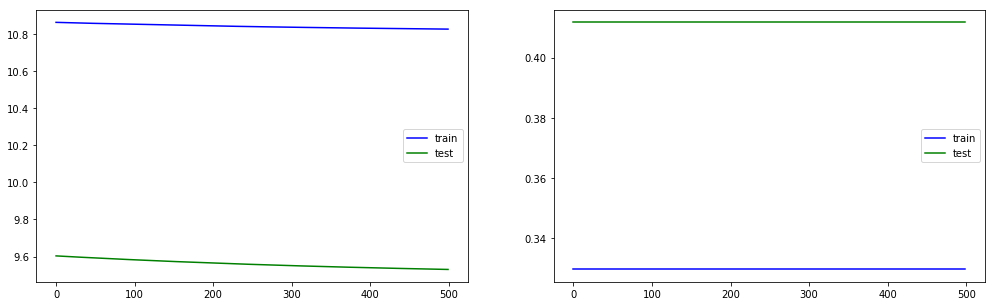

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(17, 5))

ax[0].plot(history.history['loss'], color='blue', label='train')
ax[0].plot(history.history['val_loss'], color='green', label='test')
ax[0].legend()

ax[1].plot(history.history['acc'], color='blue', label='train')
ax[1].plot(history.history['val_acc'], color='green', label='test')
ax[1].legend()